# Chapter 6 - Exercise 2
### Author: *John Benedick Estrada*
---
**Exercise:** Many named patterns are available in portable file formats. Modify `Life.py` to parse one of these formats and initialize the grid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from utils import underride

from scipy.signal import correlate2d

### Code from the book

In [2]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2016 Allen Downey
MIT License: http://opensource.org/licenses/MIT
"""


class Cell2D:
    """Parent class for 2-D cellular automata."""

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def loop(self, iters=1):
        """Runs the given number of steps."""
        for i in range(iters):
            self.step()

    def draw(self, **options):
        """Draws the array.
        """
        draw_array(self.array, **options)

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass
        

def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    options = underride(options,
                        cmap='Greens',
                        alpha=0.7,
                        vmin=0, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)


class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

### Modifications on the "Factory" function `make_file`

In [3]:
def parse_GoL(raw_str):
    IN_ALIVE_CELL = "O"
    IN_DEAD_CELL = "."
    OUT_ALIVE_CELL = "1"
    OUT_DEAD_CELL = "0"
    COMMENT = "!"

    board = []
    str_by_lines = raw_str.split("\n")
    
    for line in str_by_lines:
        board.append("")
        for char in line:
            # Ignore white spaces.
            if char.isspace():
                continue
            # Ignore the remaining characters in the line as they are commented out.
            elif char == COMMENT:
                if len(board[-1]) == 0:
                    board.pop()
                break
            elif char == IN_ALIVE_CELL:
                board[-1] += OUT_ALIVE_CELL
            elif char == IN_DEAD_CELL:
                board[-1] += OUT_DEAD_CELL
            else:
                raise ValueError(f"'{char}' is an invalid character.")
    return board


def make_life(n, m, row, col, str_input):
    life = Life(n, m)
    life.add_cells(row, col, *parse_GoL(str_input))
    return life

### Demo

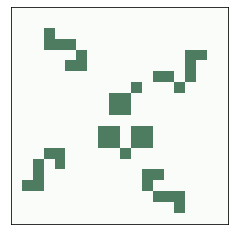

In [4]:
pattern_35P52 = """
!Name: 35P52
!With a minimum population of 35 cells it is the smallest period 52
!oscillator.
!www.conwaylife.com/wiki/index.php?title=35P52
..O
..OOO
.....O.........OO
....OO.........O
.............O.O
........OO...OO
.......O
......O
.......O.O
.......O

..OO
.O.O
.O.........OO
OO.........O
............OOO
..............O
"""

pattern_35P52_life = make_life(20, 20, 1, 1, pattern_35P52)
pattern_35P52_life.draw()
pattern_35P52_life.animate(100)